### Lab 2: HR Diagram of NGC 6819

<!-- Below are the steps to reduce data:
1. Stack bias frames to compute median frame
2. Subtract bias frame from dark frame and stack to compute median frame
3. $\rm~Flat_{\rm~{dome}} = \frac{flat_{\rm~}}{}$ -->

In [23]:
import os 
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt 

In [11]:
# Directory where data is stored
_cache_dir =  "c:\\Users\\avipa\\OneDrive\\Documents\\Coursework\\_cache\\HR_Diagram"

In [12]:
# Load Data 
hdu_lst = np.array([])
for f in os.listdir(_cache_dir):
    hdu_lst = np.append(hdu_lst, fits.open(os.path.join(_cache_dir,f)))

In [13]:
# Keys to sort fits files 
obj_lst = np.array([0]*len(hdu_lst), dtype='object')
for i in range(len(hdu_lst)):
    obj_lst[i] = hdu_lst[i].header['OBJECT']

print('filenames', np.unique(obj_lst))

filenames ['bias AR' 'darks 10 AR' 'dome flats 10 B AR' 'dome flats 10 V AR'
 'landolt B AR 25s' 'landolt V AR 30s' 'ngc 6819 B AR 25s'
 'ngc 6819 v AR 30s']


In [38]:
# Sort frames by label
bias_frames = hdu_lst[np.where(obj_lst=='bias AR')]
dark_frames = hdu_lst[np.where(obj_lst=='darks 10 AR')]

dome_flats_B_frames = hdu_lst[np.where(obj_lst=='dome flats 10 B AR')]
dome_flats_V_frames = hdu_lst[np.where(obj_lst=='dome flats 10 V AR')]

landolt_B_frames = hdu_lst[np.where(obj_lst=='landolt B AR 25s')]
landolt_V_frames = hdu_lst[np.where(obj_lst=='landolt V AR 25s')]

ngc6819_B_frames =hdu_lst[np.where(obj_lst=='ngc 6819 B AR 25s')]
ngc6819_V_frames = hdu_lst[np.where(obj_lst=='ngc 6819 v AR 30s')]

In [39]:
ngc6819_V_frames

array([<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000028EBA3E29D0>,
      dtype=object)

In [50]:
def reduce_data(bias, dark, dome_flat, science):
    """ Performs all data reduction steps and returns reduced science frame
    """

    # Median Bias Frames
    bias_full = np.median(np.stack([b.data for b in bias]),axis=0)

    # Median Dark Frames 
    dark_exptime = dark_frames[0].header['EXPTIME']
    dark_full = np.median(np.stack([(b.data - bias_full) for b in dark]),axis=0)

    # Median Dome Flats
    df_exptime = dome_flat[0].header['EXPTIME']
    dome_flat_full = np.median(np.stack([( ((b.data - bias_full)/df_exptime) \
                                        - (dark_full/dark_exptime) )/np.median(b.data) for b in dome_flat]), axis=0)

    # Median Science Frames
    sci_exptime = science[0].header['EXPTIME']
    sci_full = np.median(np.stack([(b.data - dark_full - bias_full)/ dome_flat_full for b in science]), axis=0)

    print(f"Exposure Times:\nDome Flat - {df_exptime}s\nDark - {dark_exptime}s\nScience - {sci_exptime}s\n")
    return sci_full
    

In [51]:
# Reduce science frames
red_sci_ngc6819_B = reduce_data(bias_frames, dark_frames, dome_flats_B_frames, ngc6819_B_frames)
red_sci_ngc6819_V = reduce_data(bias_frames, dark_frames, dome_flats_V_frames, ngc6819_V_frames)

C:\Users\avipa\AppData\Local\Temp\ipykernel_24752\958796032.py:19: RuntimeWarning: divide by zero encountered in divide
  sci_full = np.median(np.stack([(b.data - dark_full - bias_full)/ dome_flat_full for b in science]), axis=0)


Exposure Times:
Dome Flat - 10s
Dark - 10s
Science - 25s

Exposure Times:
Dome Flat - 10s
Dark - 10s
Science - 30s



C:\Users\avipa\AppData\Local\Temp\ipykernel_24752\958796032.py:19: RuntimeWarning: invalid value encountered in divide
  sci_full = np.median(np.stack([(b.data - dark_full - bias_full)/ dome_flat_full for b in science]), axis=0)


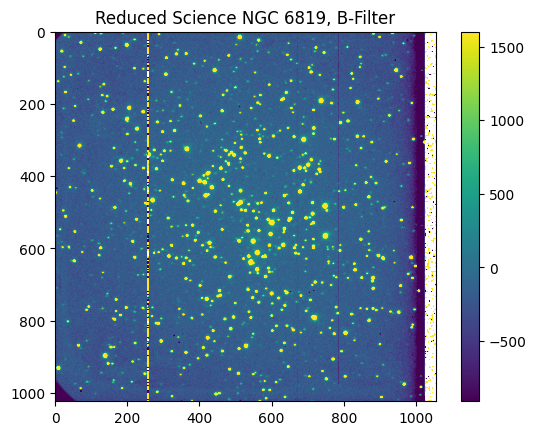

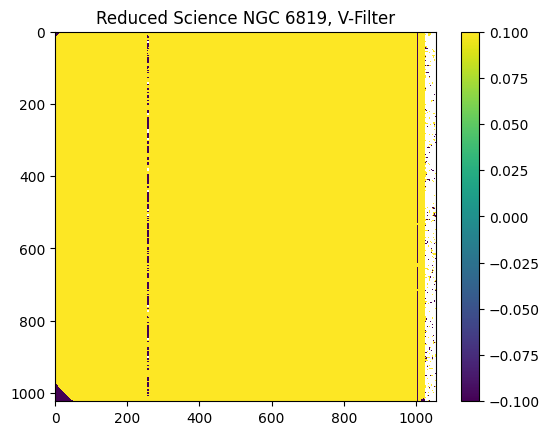

In [52]:
plt.figure()
plt.title("Reduced Science NGC 6819, B-Filter")
plt.imshow(red_sci_ngc6819_B, vmin=np.percentile(red_sci_ngc6819_B, 3), vmax=np.percentile(red_sci_ngc6819_B, 96))
plt.colorbar()

plt.figure()
plt.title("Reduced Science NGC 6819, V-Filter")
plt.imshow(red_sci_ngc6819_V, vmin=np.percentile(red_sci_ngc6819_V, 3), vmax=np.percentile(red_sci_ngc6819_V, 90))
plt.colorbar()
